In [1]:
#import needed libraries

import librosa as lb #used for feature extracion and resampling
import numpy as np 
import matplotlib.pyplot as plt
import librosa.display #builds on matplotlib to draw nice spectrograms.
import IPython.display as ipd #used to play .wav files from notebook
import pandas as pd 
# from scipy.io import wavfile #can be used to import .wav files but does not work on 24 bit depth audio files


import soundfile as sf #soundfile enables loading 24 bit depth audio files.
import time #used to measure code runtime. 
import glob
from collections import defaultdict
import pickle
import seaborn as sns
from collections import defaultdict
import scipy

In [2]:
#defining a function that reads an audio file as a numpy array
def ReadAudio(filename):
    x,sr=sf.read(filename)
    x=np.array(x)
    x=x.T
    #x=x.T #transpose to match format of librosa array representation
    #set sample rate at 22050 to reduce memory usage. 
    x=lb.resample(x,sr,22050)
        
    #change any stereo audio to mono.
    if x.shape[0] ==2:
        x=lb.to_mono(x)
     
    #change to a list.
    return x,22050

In [3]:
#get presaved dataframe of the properties of each sound:
with open('DataSummary/SummaryDFWithLabels.pickle', 'rb') as handle:
    PropsDF=pickle.load(handle)

In [4]:
PropsDF.head()

,ID_x,SR,length,Max,Min,Average,Duration,RealID,ID_y,Class
0,train\0.wav,44100,176400,0.477905,-0.522919,-0.000102,4.0,0,0.0,siren
1,train\1.wav,48000,192000,0.391418,-0.390747,-0.000525,4.0,1,1.0,street_music
2,train\10.wav,44100,176400,0.537064,-0.554016,-0.001036,4.0,10,10.0,street_music
3,train\100.wav,44100,176400,0.246109,-0.303329,0.000141,4.0,100,100.0,air_conditioner
4,train\1000.wav,44100,176400,0.210068,-0.241394,0.000050,4.0,1000,1000.0,street_music


## Feature Extraction


In [5]:
#Get all unique sounds:
TrainDF=PropsDF[pd.isnull(PropsDF['Class'])!=True]


classes=TrainDF['Class'].unique()

TrainingSoundsIDs=defaultdict(list)
#TestingSoundsIDs=defaultdict(list)


for sound in classes:
    TrainingSoundsIDs[sound].extend(TrainDF[TrainDF['Class']==sound]['RealID'].values)
    #TestingSoundsIDs[sound].extend(TestDF[TestDF['Class']==sound]['RealID'].values)
    


## What a drilling noise looks like
Note duration of sound < 4 s

In [ ]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        plt.plot(np.arange(1,len(x)+1)/sr,x)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(label)
        

## What a siren noise looks like
Note duration of sound = 4 s

In [ ]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        plt.plot(np.arange(1,len(x)+1)/sr,x)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(label)

## Feature 1: Mel-frequency cepstral coefficients:


For Drilling:

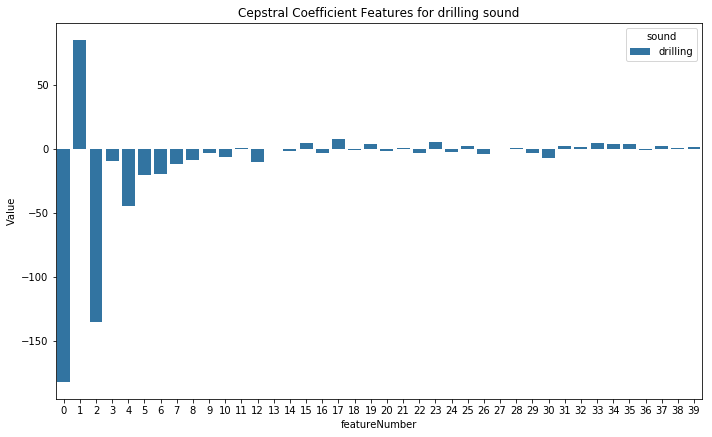

In [97]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
        D1=pd.DataFrame(mfccs,index=np.arange(0,len(mfccs)),columns=['Value'])
        D1['featureNumber']=0
        D1['sound']='drilling'
        for i in range(len(mfccs)):
            D1.iloc[i,1]=i
D1.head()
plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Cepstral Coefficient Features for drilling sound')
plt.savefig('111918/mfccs_drilling.png')

We note that the x axis here is not time, but the coefficient and the y-axis is its average over time.

for siren

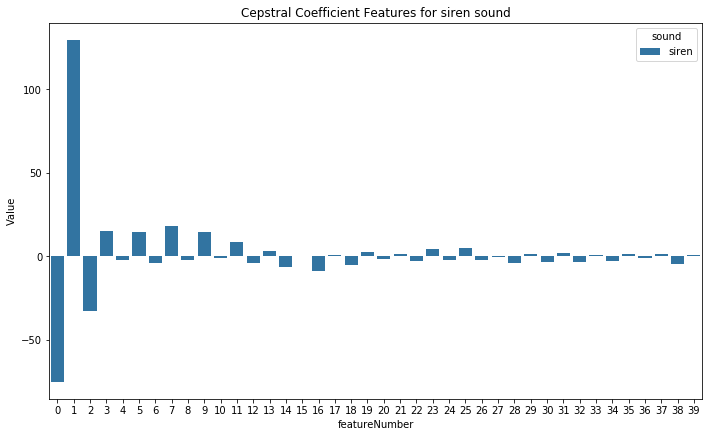

In [98]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
        D2=pd.DataFrame(mfccs,index=np.arange(0,len(mfccs)),columns=['Value'])
        D2['featureNumber']=0
        D2['sound']='siren'
        for i in range(len(mfccs)):
            D2.iloc[i,1]=i

plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D2,hue='sound')
plt.tight_layout()
plt.title('Cepstral Coefficient Features for siren sound')
plt.savefig('111918/mfccs_siren.png')
        

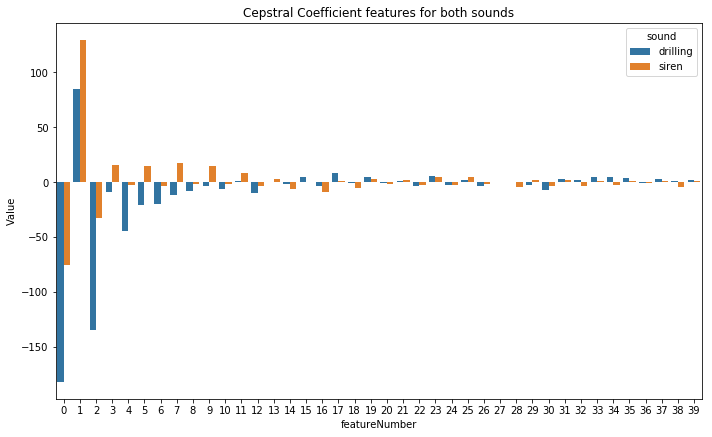

In [99]:
D1=D1.append(D2)
plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Cepstral Coefficient features for both sounds')
plt.savefig('111918/mfccs_both.png')

In [81]:
D1.shape

(80, 3)

## Feature 2: Mel-scaled power spectrogram

For Drilling

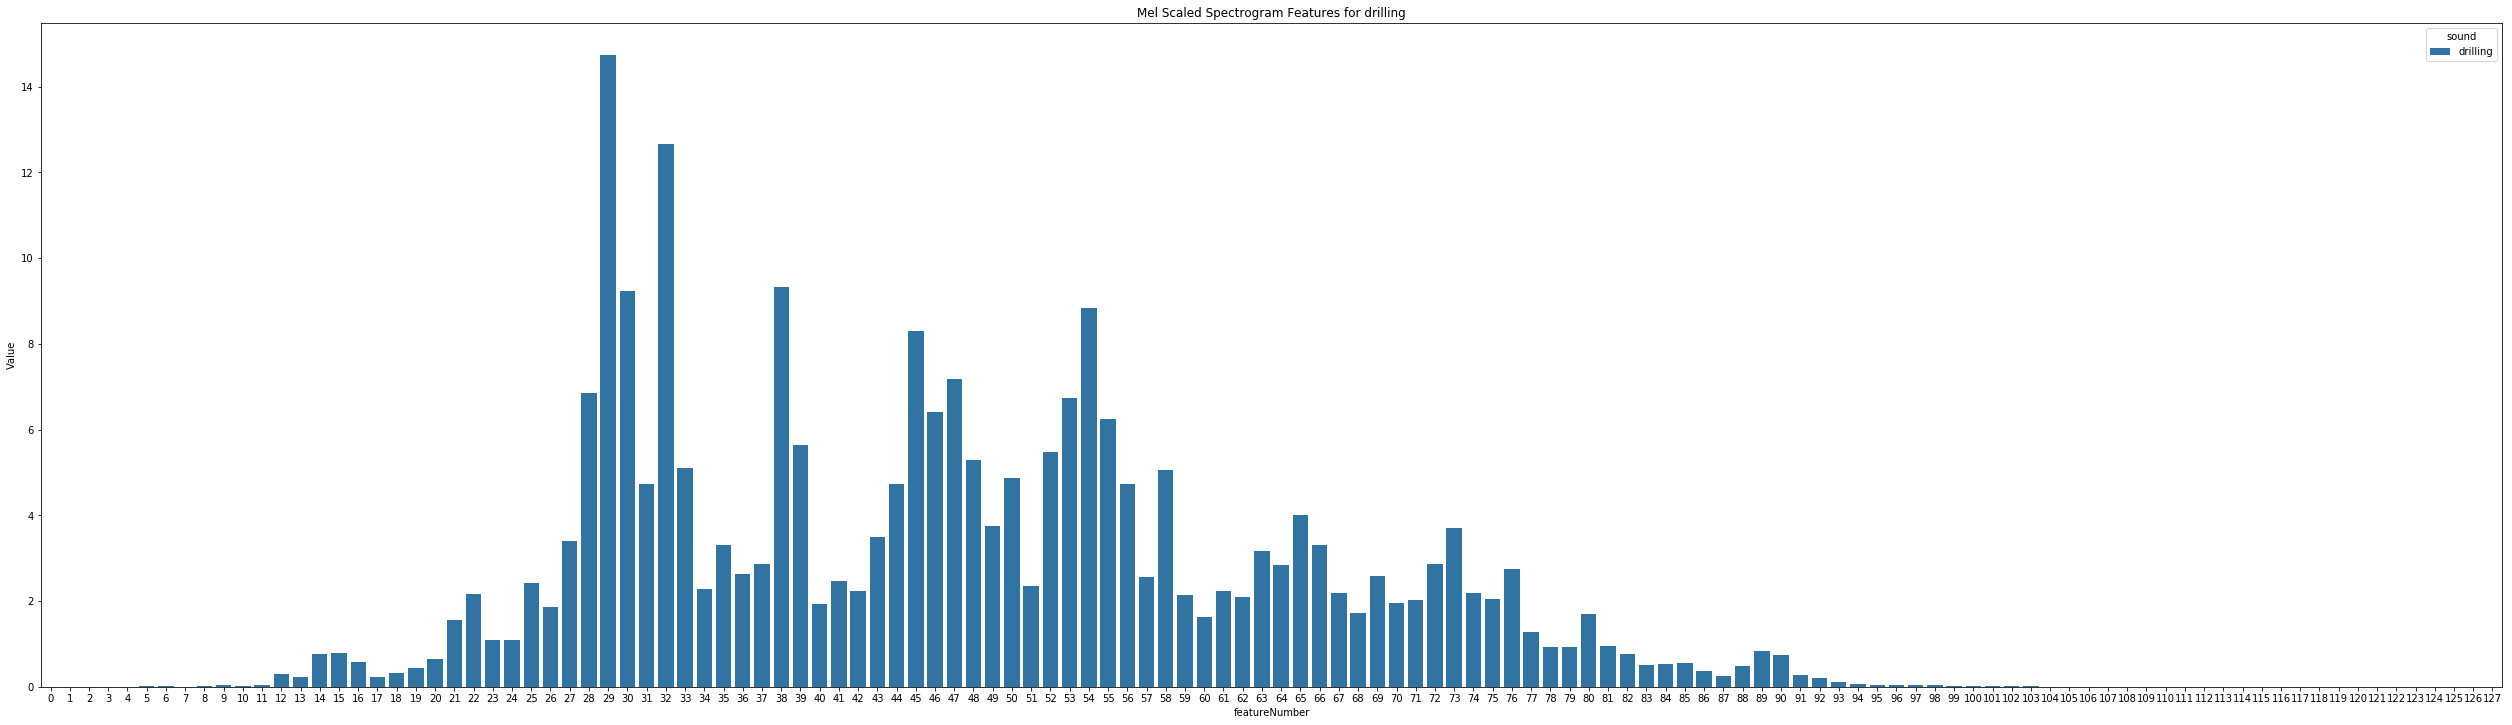

In [100]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
        D1=pd.DataFrame(mel,index=np.arange(0,len(mel)),columns=['Value'])
        D1['featureNumber']=0
        D1['sound']='drilling'
        for i in range(len(mel)):
            D1.iloc[i,1]=i
D1.head()
plt.figure(figsize=(35,10))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Mel Scaled Spectrogram Features for drilling')
plt.savefig('111918/mel_drilling.png')       

For Siren:

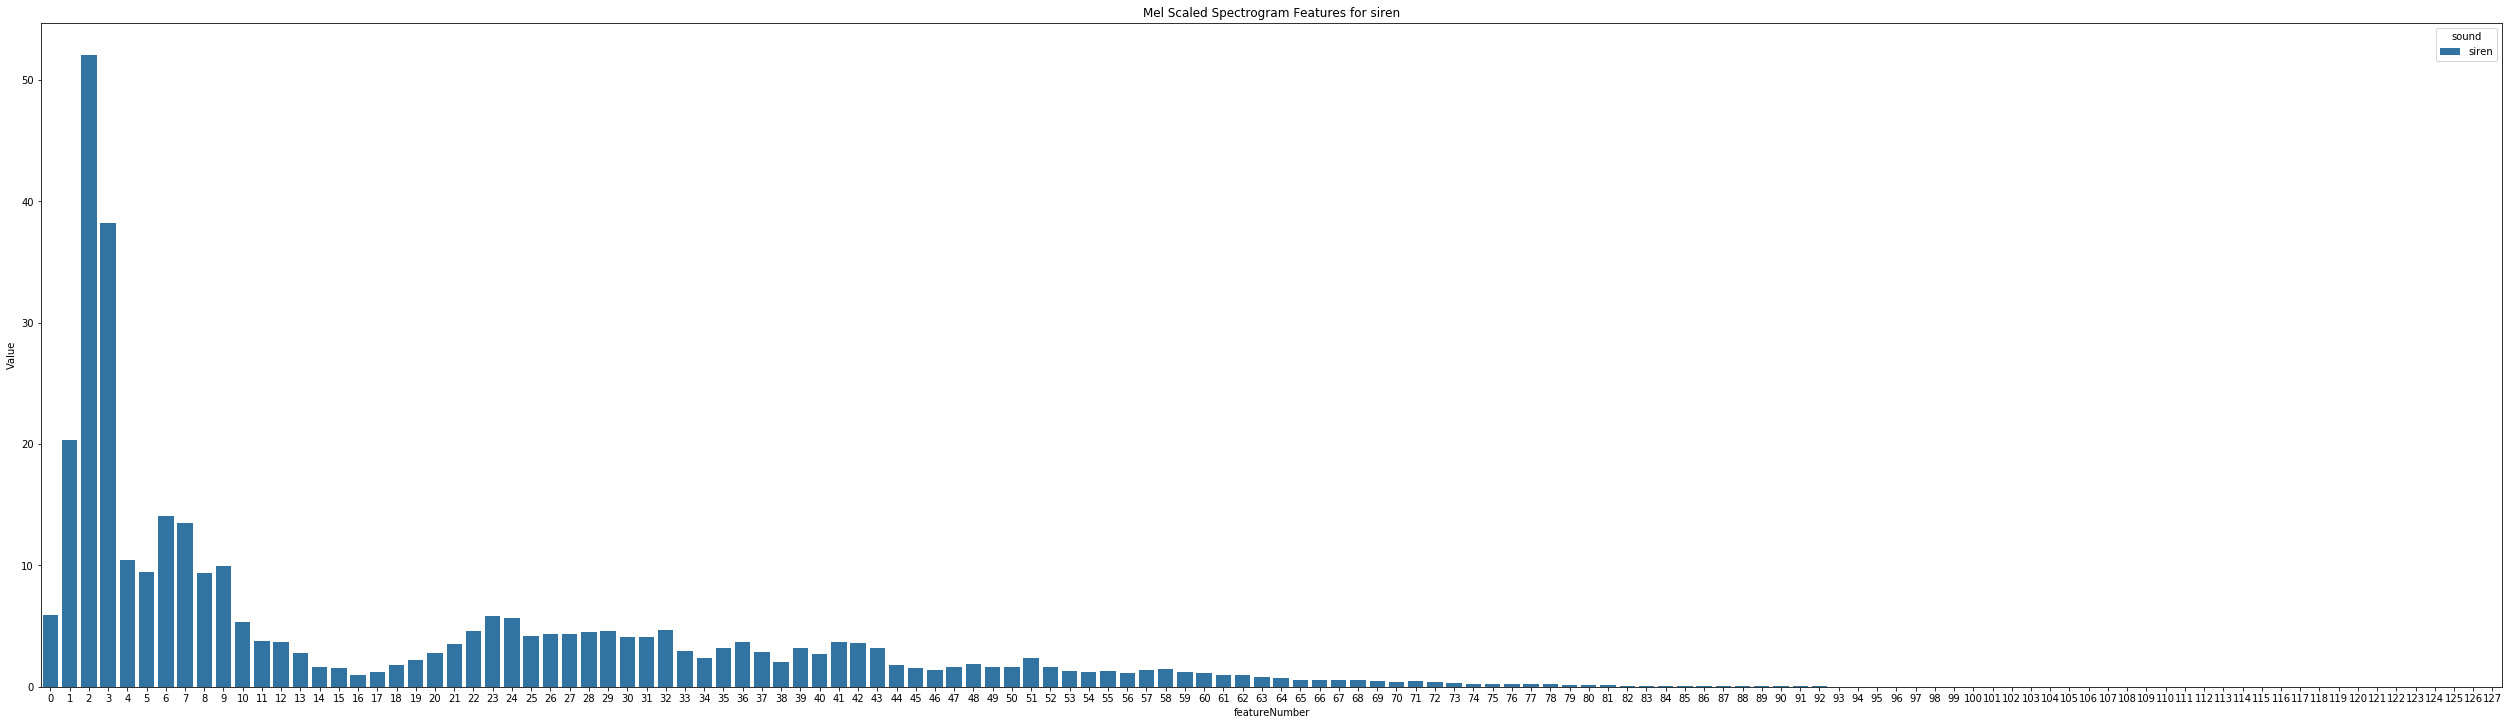

In [101]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
        D2=pd.DataFrame(mel,index=np.arange(0,len(mel)),columns=['Value'])
        D2['featureNumber']=0
        D2['sound']='siren'
        for i in range(len(mel)):
            D2.iloc[i,1]=i
#D1.head()
plt.figure(figsize=(35,10))
sns.barplot(x='featureNumber',y='Value',data=D2,hue='sound')
plt.tight_layout()
plt.title('Mel Scaled Spectrogram Features for siren')
plt.savefig('111918/mel_siren.png') 

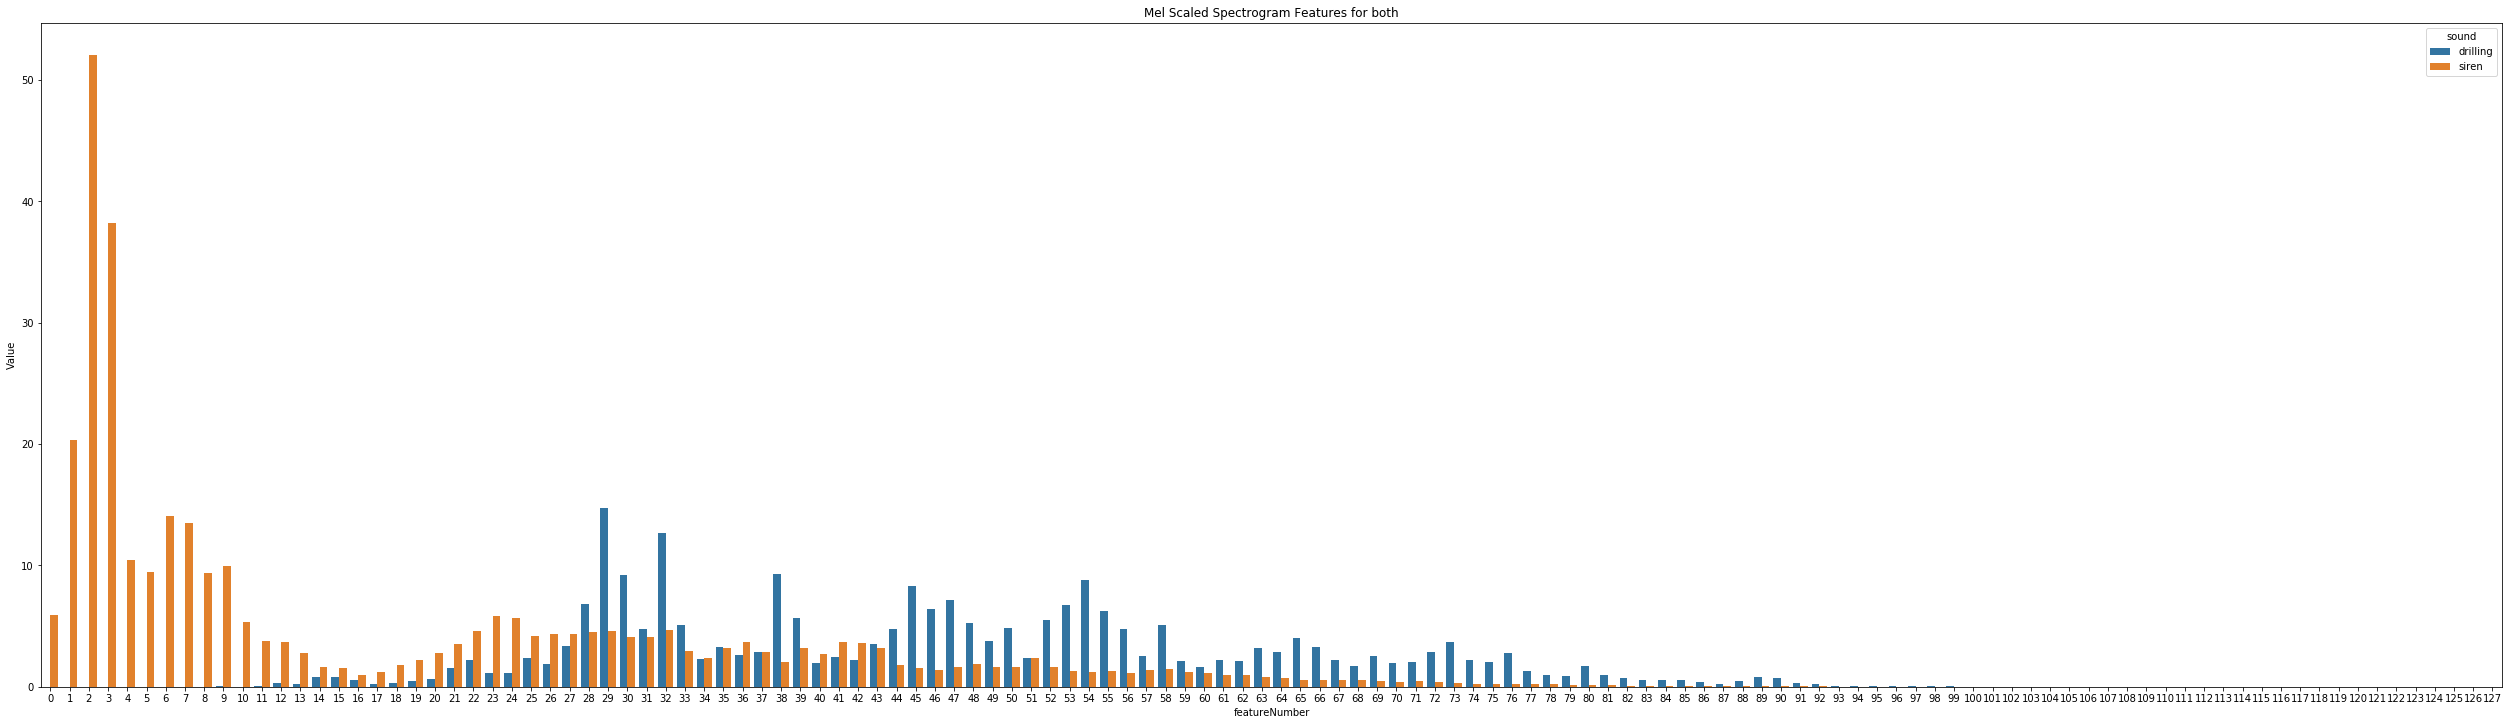

In [102]:
D1=D1.append(D2)
plt.figure(figsize=(35,10))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Mel Scaled Spectrogram Features for both')
plt.savefig('111918/mel_both.png')

## Feature 3: Chormagram of a short-time Fourier transform

For Drilling:

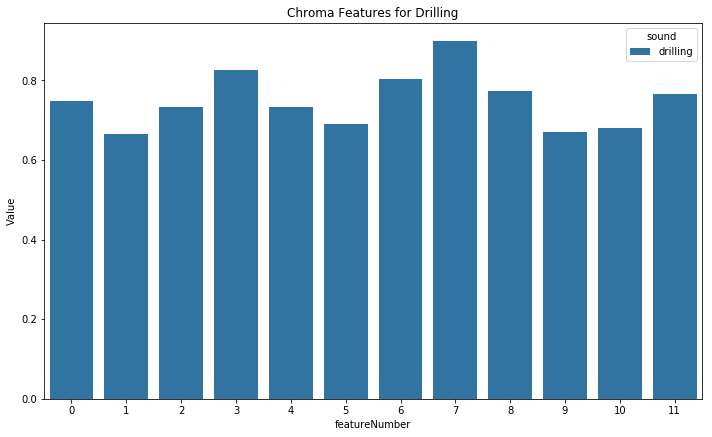

In [103]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        D1=pd.DataFrame(chroma,index=np.arange(0,len(chroma)),columns=['Value'])
        D1['featureNumber']=0
        D1['sound']='drilling'
        for i in range(len(chroma)):
            D1.iloc[i,1]=i
D1.head()
plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Chroma Features for Drilling')
plt.savefig('111918/chroma_drilling.png')       

For Siren:

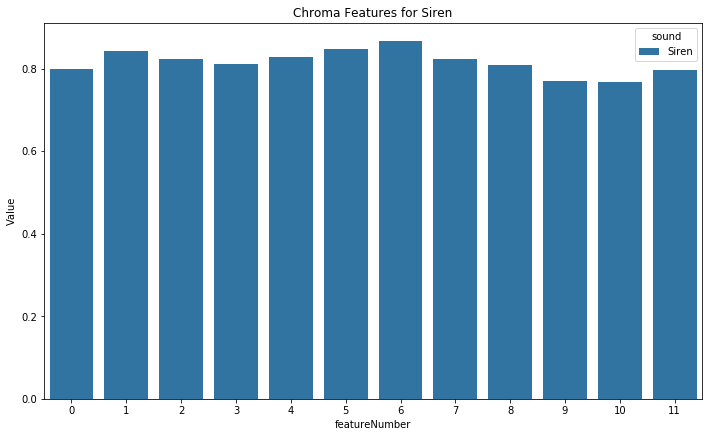

In [104]:
for counter,label in enumerate([classes[0]]):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        D2=pd.DataFrame(chroma,index=np.arange(0,len(chroma)),columns=['Value'])
        D2['featureNumber']=0
        D2['sound']='Siren'
        for i in range(len(chroma)):
            D2.iloc[i,1]=i
#D1.head()
plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D2,hue='sound')
plt.tight_layout()
plt.title('Chroma Features for Siren')
plt.savefig('111918/chroma_siren.png')               
        

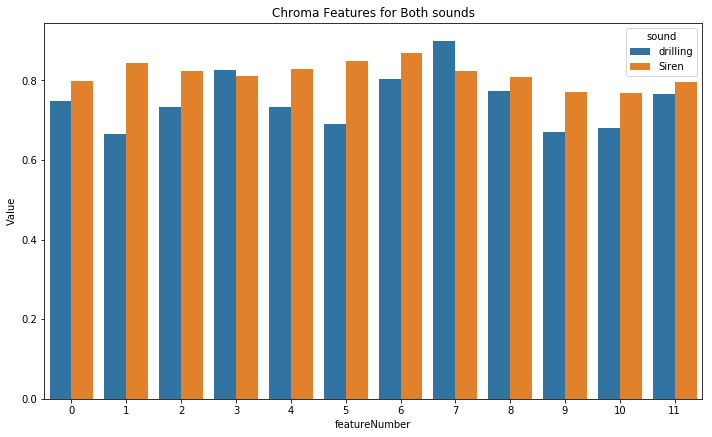

In [105]:
D1=D1.append(D2)
plt.figure(figsize=(10,6))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Chroma Features for Both sounds')
plt.savefig('111918/chroma_both.png')

## Feature 4: Octave-based spectral constrast


For Drilling:

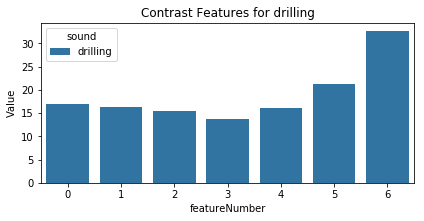

In [106]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
        D1=pd.DataFrame(contrast,index=np.arange(0,len(contrast)),columns=['Value'])
        D1['featureNumber']=0
        D1['sound']='drilling'
        for i in range(len(contrast)):
            D1.iloc[i,1]=i
D1.head()
plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Contrast Features for drilling')
plt.savefig('111918/contrast_drilling.png')       

For Siren:

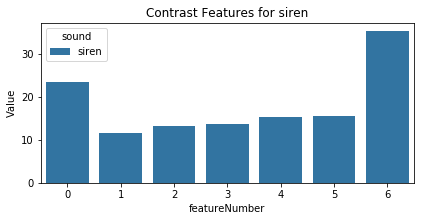

In [107]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        stft = np.abs(librosa.stft(x))
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
        D2=pd.DataFrame(contrast,index=np.arange(0,len(contrast)),columns=['Value'])
        D2['featureNumber']=0
        D2['sound']='siren'
        for i in range(len(contrast)):
            D2.iloc[i,1]=i
#D1.head()
plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D2,hue='sound')
plt.tight_layout()
plt.title('Contrast Features for siren')
plt.savefig('111918/contrast_siren.png')               

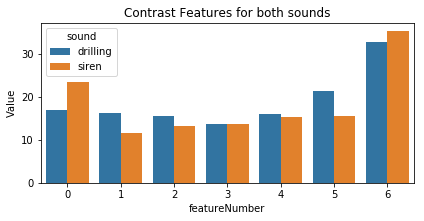

In [108]:
D1=D1.append(D2)
plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Contrast Features for both sounds')
plt.savefig('111918/contrast_both.png')

## Feature 5: Tonnetz

For Drilling:

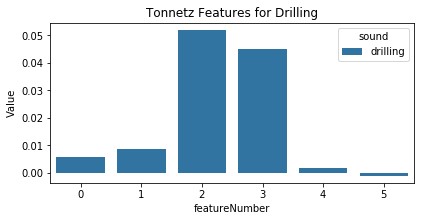

In [109]:
for counter,label in enumerate([classes[6]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
        D1=pd.DataFrame(tonnetz,index=np.arange(0,len(tonnetz)),columns=['Value'])
        D1['featureNumber']=0
        D1['sound']='drilling'
        for i in range(len(tonnetz)):
            D1.iloc[i,1]=i

plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Tonnetz Features for Drilling')
plt.savefig('111918/tonnetz_drilling.png')       

for Siren:

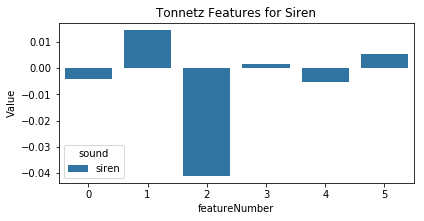

In [110]:
for counter,label in enumerate([classes[0]]):
    for sample in range(1):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
        D2=pd.DataFrame(tonnetz,index=np.arange(0,len(tonnetz)),columns=['Value'])
        D2['featureNumber']=0
        D2['sound']='siren'
        for i in range(len(tonnetz)):
            D2.iloc[i,1]=i

plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D2,hue='sound')
plt.tight_layout()
plt.title('Tonnetz Features for Siren')
plt.savefig('111918/tonnetz_siren.png')       

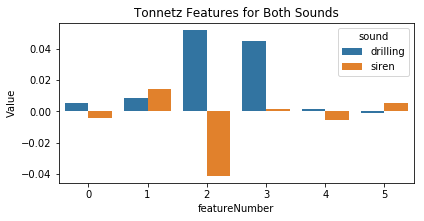

In [112]:
D1=D1.append(D2)
plt.figure(figsize=(6,3))
sns.barplot(x='featureNumber',y='Value',data=D1,hue='sound')
plt.tight_layout()
plt.title('Tonnetz Features for Both Sounds')
plt.savefig('111918/tonnetz_both.png')

We now get all these features for all our training Data. Before we do that we create a function that takes in each file and reads it then extracts all the needed features. We also concatenate all these features to get a feature of 193 dimensions for each sound

    

In [ ]:
def extractFeatures(x,sr):
    """x is numpy array"""
    stft = np.abs(librosa.stft(x))
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(x, sr=sr).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),sr=sr).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz


In [ ]:
Data=defaultdict(list)
for counter,label in enumerate(classes):
    for sample in range(len(TrainingSoundsIDs[label])):
        localfile=TrainingSoundsIDs[label][sample]
        fullname='train\{}.wav'.format(str(localfile))
        x,sr=ReadAudio(fullname)
        mfccs,chroma,mel,contrast,tonnetz=extractFeatures(x,sr)
        Data['label'].append(label)
        Data['ID'].append(localfile)
        Data['mfccs'].append(mfccs)
        Data['chroma'].append(chroma)
        Data['mel'].append(mel)
        Data['contrast'].append(contrast)
        Data['tonnetz'].append(tonnetz)
        

In [ ]:
DF=pd.DataFrame.from_dict(Data)

In [ ]:
DF.set_index('ID')

In [131]:
with open('DataSummary\Features.pickle','wb') as file:
    pickle.dump(DF,file)

In [134]:
#start from here
with open('DataSummary\Features.pickle','rb') as file:
    DF=pickle.load(file)
DF.shape

(5435, 3)

In [136]:
DF.head()

,label,ID,FeatureVector
0,siren,0,"[-75.09571792626822, 129.61184458091378, -32.6..."
1,siren,1017,"[-529.8225494418793, 3.2076505339364685, -39.3..."
2,siren,1068,"[-321.6916830761862, 142.7038945186553, -29.06..."
3,siren,1069,"[-251.96383863061635, 114.6776430250902, -70.2..."
4,siren,1116,"[-341.2867620636534, 148.38603712522664, -19.5..."


## Question 1: How are the MFCC coefficient's values distibuted for each class (sound)

In [135]:
DF1=DF[['label','mfccs']]

KeyError: "['mfccs'] not in index"

In [130]:
DF1.shape

NameError: name 'DF1' is not defined

In [ ]:
#we look at the first coefficient:
DF1['SingleCoeff']=DF1.apply(lambda row: row.mfccs[0],axis=1)

In [ ]:
DF1.head()

In [ ]:
#see if there are any NaN values:
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]

In [ ]:
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.title('First Coefficient')


we do the same with the second coefficient for MFCC

In [ ]:
DF1['SingleCoeff']=DF1.apply(lambda row: row.mfccs[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.title('Second Coefficient')

In [ ]:
#find the two coefficients that have the highest pearson cofficient:
Mat=np.empty((40,len(DF1)))
for i in range(len(DF1)):
    Mat[:,i]=DF1.mfccs.iloc[i]
    
PearsonCoeff=np.corrcoef(Mat)

In [ ]:
for i in range(len(PearsonCoeff)):
    PearsonCoeff[i,i]=0
    
plt.imshow(PearsonCoeff)


plt.colorbar()

In [ ]:
PearsonCoeff[15,16]

In [ ]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[15],axis=1)
DF1['c2']=DF1.apply(lambda row: row.mfccs[16],axis=1)
for label in DF1.label.unique():
    plt.scatter(DF1[DF1.label==label]['c1'],DF1[DF1.label==label]['c2'],label=label)
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.tight_layout()
plt.xlabel('15th Coeff Value')
plt.ylabel('16th Coeff Value')
plt.axis('equal')

In [ ]:
np.min(PearsonCoeff)

In [ ]:
PearsonCoeff[37,39]

In [ ]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[37],axis=1)
DF1['c2']=DF1.apply(lambda row: row.mfccs[39],axis=1)
for label in DF1.label.unique():
    plt.scatter(DF1[DF1.label==label]['c1'],DF1[DF1.label==label]['c2'],label=label)
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.tight_layout()
plt.xlabel('37th Coeff Value')
plt.ylabel('39th Coeff Value')
plt.axis('equal')

Even though we have looked at the distribution of the coefficients for each class using box plots and scatter plots, we see how ecdfs (cumulative distribution functions) look like for the 1st MFCC coeff:

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    
    return x,y
    

In [ ]:
DF1['c1']=DF1.apply(lambda row: row.mfccs[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('First Spectral Coefficient')
plt.ylabel('ECDF')


We will now do the same exercise for the other features starting with: chroma

In [ ]:
DF1=DF[['label','chroma']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.chroma[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

In [ ]:
DF1=DF[['label','chroma']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.chroma[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

In [ ]:
DF1['c1']=DF1.apply(lambda row: row.chroma[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('First Chroma Coefficient')
plt.ylabel('ECDF')

In [ ]:
DF1['c1']=DF1.apply(lambda row: row.chroma[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)

plt.legend()
plt.xlabel('Second Chroma Coefficient')
plt.ylabel('ECDF')


mel

In [ ]:
DF1=DF[['label','mel']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.mel[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.mel[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.mel[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First mel Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.mel[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second mel Coefficient')
plt.ylabel('ECDF')

contrast

In [ ]:
DF1=DF[['label','contrast']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.contrast[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.contrast[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.contrast[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First contrast Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.contrast[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second contrast Coefficient')
plt.ylabel('ECDF')

tonnetz

In [ ]:
DF1=DF[['label','tonnetz']]
DF1['SingleCoeff']=DF1.apply(lambda row: row.tonnetz[0],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('firstCoeff')

plt.figure()
DF1['SingleCoeff']=DF1.apply(lambda row: row.tonnetz[1],axis=1)
assert np.unique(pd.isnull(DF1.SingleCoeff.values)) ==[False]
sns.boxplot(x='label',y='SingleCoeff',data=DF1)
plt.xticks(rotation='vertical')
plt.ylabel('SecondCoeff')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.tonnetz[0],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('First tonnetz Coefficient')
plt.ylabel('ECDF')

plt.figure()
DF1['c1']=DF1.apply(lambda row: row.tonnetz[1],axis=1)
for label in DF1.label.unique():
    x,y=ecdf(DF1[DF1.label==label]['c1'])
    plt.plot(x,y,label=label)
plt.legend()
plt.xlabel('Second tonnetz Coefficient')
plt.ylabel('ECDF')

## Finding Distribution of means

In [113]:
with open('DataSummary\Features.pickle','rb') as file:
    DF=pickle.load(file)
DF.shape

(5435, 7)

In [114]:
length=0
for col in DF.columns[2:]:
    length+=len(DF[col][0])
    
print('each sound has features of length: '+str(length))

each sound has features of length: 193


for every class we will get the mean and std of each feature. We build a Data frame that stores the mean and medians of each feature:

In [115]:
DF['FeatureVector']=DF.apply(lambda row: np.hstack((row.mfccs,row.chroma,row.mel,row.contrast,row.tonnetz)),axis=1)

In [116]:
DF=DF[['label','ID','FeatureVector']]

In [117]:
DF.head()

,label,ID,FeatureVector
0,siren,0,"[-75.09571792626822, 129.61184458091378, -32.6..."
1,siren,1017,"[-529.8225494418793, 3.2076505339364685, -39.3..."
2,siren,1068,"[-321.6916830761862, 142.7038945186553, -29.06..."
3,siren,1069,"[-251.96383863061635, 114.6776430250902, -70.2..."
4,siren,1116,"[-341.2867620636534, 148.38603712522664, -19.5..."


In [118]:
featureInfo=defaultdict(list)
for sound in classes:
    for feature in range(193):
        #calculate the mean:
        DFnow=DF[DF['label']==sound]
        aa=np.zeros((len(DFnow),))
        for i in range(len(DFnow)):
            aa[i]=DFnow.FeatureVector.iloc[i][feature]
        aa=np.array(aa)
        featureInfo[feature].append(np.mean(aa))

        
        

In [137]:
featureInfo=pd.DataFrame.from_dict(featureInfo)
featureInfo['label']=classes
featureInfo.head(10)

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,label
0,-300.513380,140.535752,-38.854834,-1.521374,-11.289074,11.397450,9.818977,10.128545,-3.961338,6.948646,...,21.087021,21.209784,33.752628,-0.002784,0.004276,-0.005492,-0.001879,0.001390,0.001716,siren
1,-222.684765,127.932307,-19.914996,18.903519,-4.346779,4.456734,-5.716090,0.077333,-6.294900,1.617931,...,19.458158,19.928523,33.200788,0.003436,0.010795,-0.007172,0.003461,0.001354,0.001850,street_music
2,-246.686679,125.883357,-2.331604,21.107996,5.676171,12.290029,1.535647,9.726124,-0.880018,5.186194,...,16.123348,16.809486,32.050509,-0.001472,0.011483,-0.031604,-0.019198,0.004960,-0.000150,air_conditioner
3,-323.512857,111.330886,-22.052062,-5.566127,-9.999323,-0.955628,-6.910894,0.225471,-2.822838,2.133296,...,18.742571,18.512039,30.951920,-0.001064,0.008052,-0.004648,0.010290,0.003245,0.003037,dog_bark
4,-120.231269,88.343473,-11.179737,20.524013,-6.523954,12.202459,-3.624052,8.785070,-7.620795,4.834631,...,15.403066,16.792736,34.850262,-0.002385,0.001439,0.000405,0.026190,-0.002406,0.006060,jackhammer
5,-184.737018,112.768129,-36.319785,22.178084,-5.877188,-1.479726,2.949503,5.032389,-10.304461,6.432345,...,22.453356,23.924394,34.851040,-0.000015,0.000043,0.033548,0.037644,-0.009297,0.004661,car_horn
6,-131.563420,53.134386,-27.346698,7.052724,-10.359538,2.060020,-4.232519,2.630495,-4.760993,0.974084,...,16.598004,18.124394,32.902759,-0.001385,-0.001786,0.005739,-0.002459,0.001686,-0.001647,drilling
7,-270.151953,108.845996,-31.729275,17.588223,-6.244313,6.790487,-2.083449,2.318447,-0.621398,2.915704,...,17.937575,18.526941,32.545408,-0.002862,0.009993,-0.001264,0.005439,0.002825,0.002751,children_playing
8,-242.600829,94.302372,-23.864243,7.554563,-12.473801,2.201857,-5.986336,3.742585,-3.182458,2.297363,...,15.264481,16.335832,32.775710,-0.003106,0.012809,-0.008326,0.015633,0.003489,0.006723,gun_shot
9,-208.475961,120.212613,-8.354217,24.977418,-0.179493,15.439276,2.815531,8.333989,-1.513252,5.139938,...,15.582195,16.663787,31.880800,-0.001626,0.015676,0.009604,0.000358,0.004615,0.007300,engine_idling


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

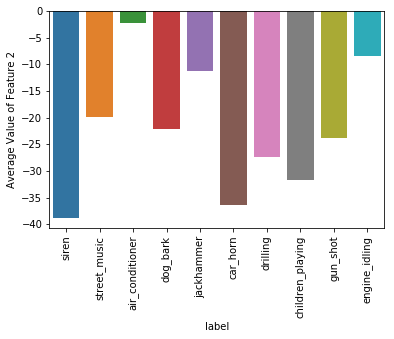

In [128]:
sns.barplot(x='label',y=2,data=featureInfo)
plt.ylabel('Average Value of Feature 2')
plt.xticks(rotation='vertical')

## Coefficient of Variation: We compute the coefficient of variation for each feature:

In [ ]:
Matrix=np.zeros((193,))
for i in range(193):
    Matrix[i]=np.std(featureInfo[i])/np.mean(featureInfo[i])

In [ ]:
Matrix

In [ ]:
Matrix1=np.abs(Matrix)
ind=np.argmin(Matrix)
print(ind)

In [ ]:
plt.scatter(classes,featureInfo[ind])
plt.xticks(rotation='vertical')

In [ ]:
ind=3
plt.scatter(classes,featureInfo[ind])
plt.xticks(rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Mean of Feature Number '+str(ind))

In [ ]:
sns.boxplot(y=ind,data=featureInfo)

In [ ]:
classes

In [ ]:
DFnow=featureInfo[featureInfo.label=='siren']
arr=DFnow.iloc[0,0:193]

In [ ]:
plt.bar(np.arange(0,193),arr)
plt.title('features for siren')
plt.xlabel('feature number')
plt.ylabel('feature value')

In [ ]:
sns.boxplot(x='label',y=1,data=featureInfo)
plt.xticks(rotation='vertical')

we now have two dataframes:
DF and featureInfo. DF containes the feature vector of each sample, when feature Info contains the means of each feature for each class.
For every row in DF we get a 193 element vetor that at each entry gives the class whose mean is closest to the feature's value.

In [141]:
DF2=pd.DataFrame.copy(DF)
DF2['guess']=0

for i in range(5435):
    guess=np.zeros(len(classes),)
    for j in range(len(DF2.FeatureVector.iloc[i])):
        fVal=DF2.FeatureVector.iloc[i][j]
        distance=np.abs(featureInfo[j]-fVal)
        guess[np.argmin(distance)]+=1
    DF2['guess'].iloc[i]=classes[np.argmax(guess)]
        
        

C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
C:\Users\MHarajli\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [143]:
DF2.head()

,label,ID,FeatureVector,guess
0,siren,0,"[-75.09571792626822, 129.61184458091378, -32.6...",street_music
1,siren,1017,"[-529.8225494418793, 3.2076505339364685, -39.3...",siren
2,siren,1068,"[-321.6916830761862, 142.7038945186553, -29.06...",siren
3,siren,1069,"[-251.96383863061635, 114.6776430250902, -70.2...",siren
4,siren,1116,"[-341.2867620636534, 148.38603712522664, -19.5...",siren


In [144]:
from sklearn.metrics import confusion_matrix

In [150]:
ConfMatrix=confusion_matrix(DF2['label'].values,DF2['guess'].values,labels=classes)

In [154]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[590   4   6   1   0   1   1   1   0   3]
 [498  14  27   9   2  18   9  10  10   3]
 [413   2 139   2   2  28   2   2   2   8]
 [506   1  26   3   1  13  11  24  15   0]
 [165  10 286   5  49   6  49  24  18  56]
 [207   4  29   1   1  60   1   0   1   2]
 [121   4 195   5  14  31 145  63  14   8]
 [499   1  47   0   2   6   4  37   2   2]
 [ 18   1  58  12   9   2  24   3  98   5]
 [397   8 139   1  33  15   4   1   3  23]]


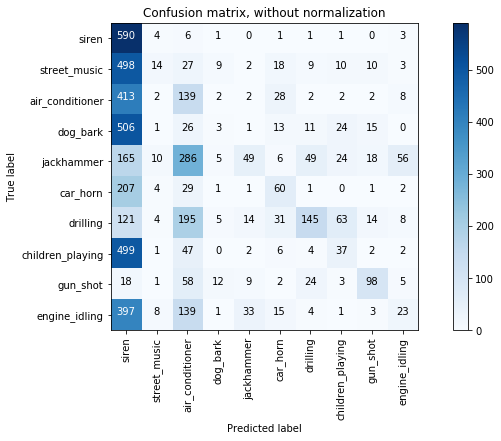

In [159]:

plt.figure(figsize=(10,6))
plot_confusion_matrix(ConfMatrix, classes=classes,title='Confusion matrix, without normalization')
plt.xticks(rotation='vertical')

plt.savefig('ConfusionMatrix.png')